In [2]:
import matplotlib.pyplot as plt
import math

In [33]:
#Call
call=[[13300,482],[13350,431.15],[13400,386.15],[13450,340.5],[13500,501.75],[13550,470.1],[13600,440.1],[13650,400],[13700,375.1]]

#Put
put=[[13300,20.7],[13350,23.45],[13400,27],[13450,30.8],[13500,199],[13550,218.4],[13600,239],[13650,252],[13700,270.2]]

# Current Price

s0=13749.25

In [34]:
#Call
call=[[13300,647.65],[13350,620],[13400,574.95],[13450,524],[13500,297.05],[13550,250.8],[13600,213.1],[13650,170.4],[13700,143.2]]

#Put
put=[[13300,148.65],[13350,164.05],[13400,171],[13450,179.5],[13500,36.40],[13550,42.85],[13600,52.9],[13650,65.6],[13700,80.8]]

# Current Price

s0=13749.25

In [35]:
# Buy Large strike price call and lower strike price put

In [36]:
def r2r_payoff(call_strike,put_strike,call,put,s0):
    
    x=[]
    y=[]
    for i in range(0,put_strike*2):
        x.append(i)
        if i<=put_strike:
            y.append(put_strike - i - call - put)
        elif i<=call_strike:
            y.append(- call - put)
        elif i>call_strike:
            y.append(i - call_strike - call - put)
    return [((call+put)*(call_strike-put_strike + call + put)/((s0+put_strike)*(s0+call_strike))) -abs((call_strike+put_strike)/2 -s0)/25000 ,call_strike,put_strike,call,put,s0]
#     25 is the calibration factor for normalising
#     return [round(25*(((call+put)/(s0+strike))**2) - abs(strike - s0)/(strike),2),call_strike,put_strike,call,put,s0]

def payoff_plot(call_strike,put_strike,call,put,s0):
    x=[]
    y=[]

    for i in range(call_strike-1000,put_strike+1000):
        x.append(i)
        if i<=put_strike:
            y.append(put_strike - i - call - put)
        elif i<=call_strike:
            y.append(- call - put)
        elif i>call_strike:
            y.append(i - call_strike - call - put)

    plt.figure(figsize=(16,6))
    plt.plot(x,y)
    
    plt.axvline(call_strike,ls=":",color="green")
    plt.text(call_strike,0,round(call_strike,2),horizontalalignment='left',verticalalignment="top",fontsize=12)
    
    plt.axvline(put_strike,ls=":",color="green")
    plt.text(put_strike,0,round(put_strike,2),horizontalalignment='left',verticalalignment="top",fontsize=12)
    
    plt.axvline(s0,ls=":",color="red")
    plt.text(s0,0,s0,horizontalalignment='left',verticalalignment="bottom",fontsize=12,color="red")
    
    plt.axhline(min(y),ls=":",label=round(min(y),2))
    plt.axhline(0,color="k",ls=":")
    
    plt.axvline(put_strike-call-put,color="k")
    plt.text(put_strike-call-put,0,round(put_strike-call-put,2),horizontalalignment='left',verticalalignment="top",fontsize=12)
    
    plt.axvline(call_strike+call+put,color="k")
    plt.text(call_strike+call+put,0,round(call_strike+call+put,2),horizontalalignment='left',verticalalignment="top",fontsize=12)
    plt.xlabel("Stock Price at Expiry")
    plt.ylabel("Payout")
    plt.legend(loc=5)

[13350, 13300, 620, 148.65, 13749.25]


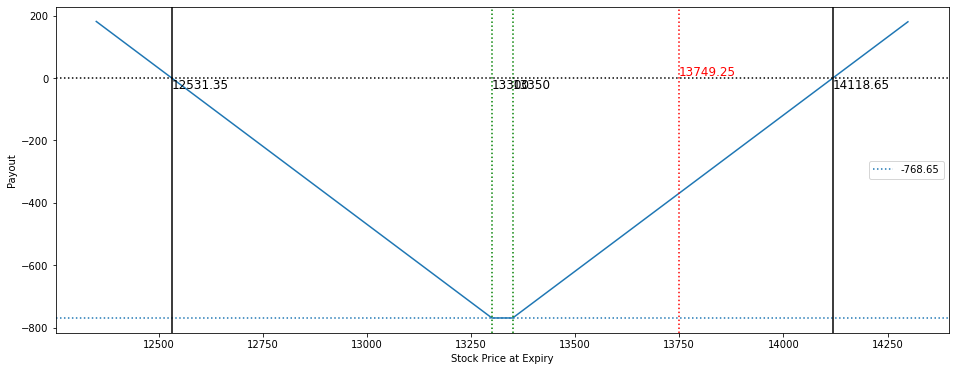

In [37]:
l = len(call)

opti=[math.inf,0,0]

for i in range(l):
    put_strike=put[i][0]
    p=put[i][1]
    for j in range(i+1,l):
        c=call[j][1]
        call_strike = call[j][0]
        r2r=r2r_payoff(call_strike,put_strike, c,p,s0)
        if opti[0]>r2r[0]:
            opti=r2r

print(opti[1:])
# Call Strike, Put Strike, Call_price , Put_price, s0
payoff_plot(opti[1],opti[2],opti[3],opti[4],s0)


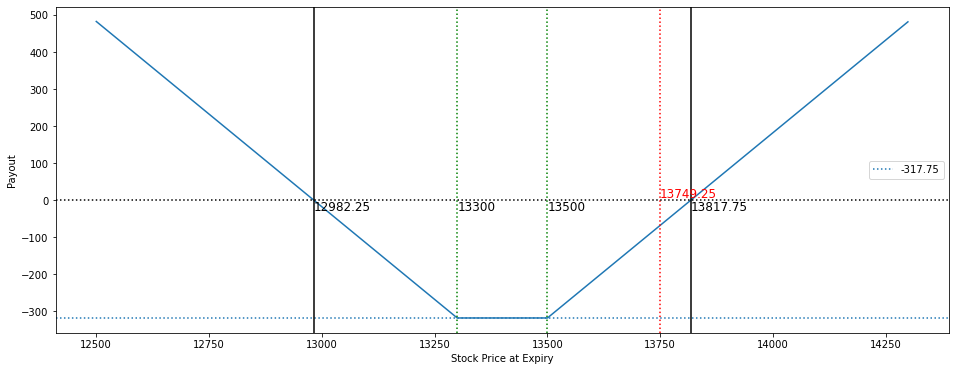

In [8]:
# payoff_plot(call_strike,put_strike,call,put,s0)
payoff_plot(13500,13300,297.05,20.7,13749.25)

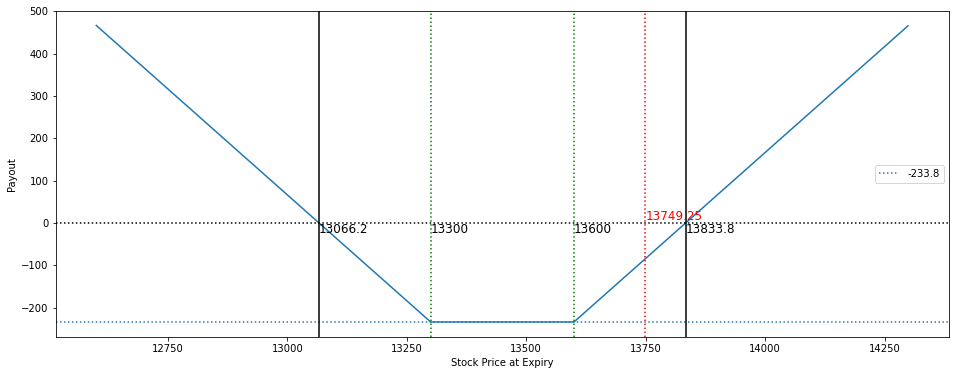

In [9]:
payoff_plot(13600,13300,213.1,20.7,13749.25)